# Load data

In [33]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

from generatedata.load_data import load_data
from generatedata.StartTargetData import StartTargetData

In [34]:
data_dict = load_data('MNIST')
# Read the start data
x_start = data_dict['start']
# Read the target data
x_target = data_dict['target']


# Dynamical system

In [35]:
x_size = x_start.shape[1]

# # A pytorch module that multiplies the output of two other modules, where the two modules are given as arguments to the constructor, and the fo
# # The forward method takes a single argument and returns a single tensor.
# class Multiply(nn.Module):
#     def __init__(self, module1, module2):
#         super().__init__()
#         self.module1 = module1
#         self.module2 = module2
#     def forward(self, x):
#         return self.module1(x) * self.module2(x)

# map = Multiply(nn.Linear(x_size, x_size), nn.Linear(x_size, x_size)) 

map = nn.Sequential(nn.Linear(x_size, x_size), nn.LeakyReLU(), nn.Linear(x_size, x_size))

In [36]:
# Turn a pandas dataframe into a pytorch tensor
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Make two pytorch tensor datasets from the start and target data
x_start_tensor = df_to_tensor(x_start)
x_target_tensor = df_to_tensor(x_target)
    
train_data = StartTargetData(x_start_tensor, x_target_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)

In [37]:
# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.RAdam(map.parameters())

In [38]:
max_epochs = 500
# Train the model
for epoch in range(max_epochs):
    for batch_idx, (start, target) in enumerate(train_loader):
        optimizer.zero_grad()
        mapped = map(start)
        loss = criterion(mapped, target)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Batch {batch_idx}, Loss {loss.item()}')

Epoch 0, Batch 9, Loss 0.9012860059738159
Epoch 100, Batch 9, Loss 0.009322701022028923
Epoch 200, Batch 9, Loss 0.004982267040759325
Epoch 300, Batch 9, Loss 0.002368065994232893
Epoch 400, Batch 9, Loss 0.001817049691453576


# Training data

In [39]:
plot_idx = 2
mapped_tensor = map(x_start_tensor).detach()
print('before: ', x_start_tensor[plot_idx][-1])
print('after:  ', mapped_tensor[plot_idx][-1])
print('truth:  ', x_target_tensor[plot_idx][-1])



before:  tensor(0.1000)
after:   tensor(0.0270)
truth:   tensor(0.)


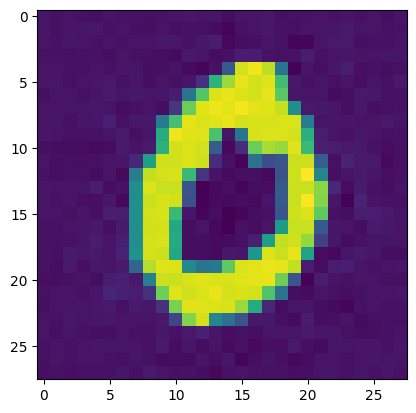

In [40]:
plt.figure()
plt.imshow(mapped_tensor[plot_idx][:28*28].reshape(28, 28).numpy())

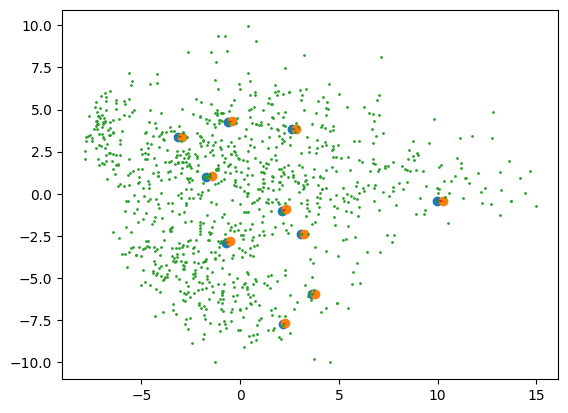

In [41]:
mapped_tensor = map(x_start_tensor).detach()
plot_points = 10

from sklearn.decomposition import PCA


def plot_tensor_projections(x_start_tensor, mapped_tensor, x_target_tensor, plot_points):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt


    pca = PCA(n_components=2)
    pca.fit(x_target_tensor)
    # Project tensors to 2D using PCA
    x_start_tensor_2 = pca.transform(x_start_tensor)[:plot_points]
    mapped_tensor_2 = pca.transform(mapped_tensor)[:plot_points]
    x_target_tensor_2 = pca.transform(x_target_tensor)

    # Plot the 2D PCA projections and arrows
    fig, ax = plt.subplots()
    ax.scatter(x_start_tensor_2[:,0], x_start_tensor_2[:,1])
    ax.scatter(mapped_tensor_2[:,0], mapped_tensor_2[:,1])
    dx = mapped_tensor_2[:,0]-x_start_tensor_2[:,0]
    dy = mapped_tensor_2[:,1]-x_start_tensor_2[:,1]
    ax.quiver(x_start_tensor_2[:,0], x_start_tensor_2[:,1], dx, dy, scale=1, scale_units='xy', angles='xy', color='r', width=0.005)
    ax.scatter(x_target_tensor_2[:,0], x_target_tensor_2[:,1], s=1)
    plt.show()

# Plot the 2D PCA projections and arrows for the three tensors
plot_tensor_projections(x_start_tensor, mapped_tensor, x_target_tensor, plot_points)

# Testing data

## Testing label

In [42]:
plot_idx = 2
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]


for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(test_tensor).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)


before:  tensor(0.) after:   tensor(0.0255) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(0.0413) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(0.0588) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(0.0776) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(0.0980) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(0.1259) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(0.1536) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(0.1799) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(0.2055) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(0.2312) truth:  tensor(0.)


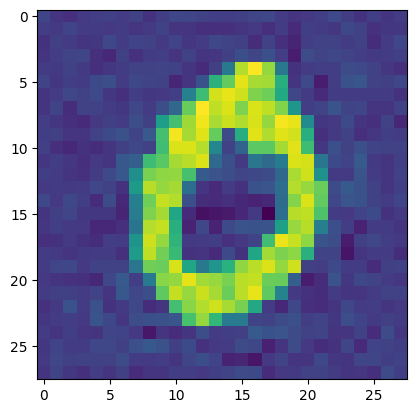

In [43]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

In [44]:
plot_idx = 155
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

before:  tensor(0.) after:   tensor(0.0021) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(0.0046) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(0.0072) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(0.0096) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(0.0124) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(0.0181) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(0.0250) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(0.0321) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(0.0404) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(0.0485) truth:  tensor(0.)


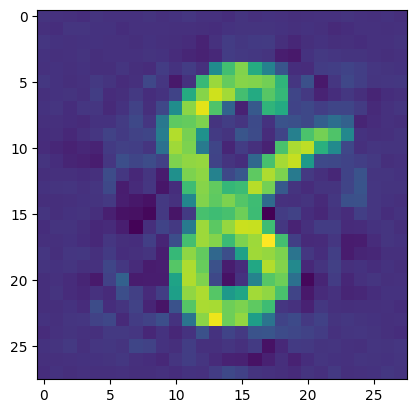

In [45]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

## Testing everything

In [46]:
plot_idx = 0
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

before:  tensor(0.) after:   tensor(0.2230) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(0.2155) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(0.2086) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(0.2015) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(0.1933) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(0.1905) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(0.1879) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(0.1866) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(0.1868) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(0.1877) truth:  tensor(0.)


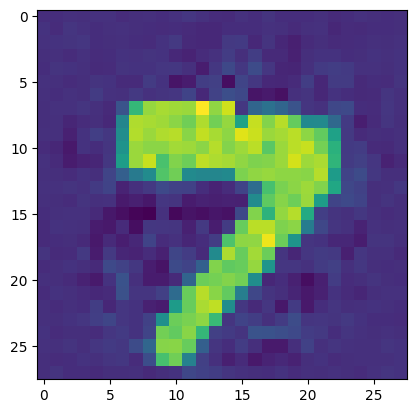

In [47]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())

In [48]:
plot_idx = 1
test_tensor = x_start_tensor[plot_idx]
test_truth = x_target_tensor[plot_idx][-1]

for i in range(10):
    test_tensor[-1] = i
    mapped_tensor = map(map(test_tensor)).detach()
    print('before: ', test_tensor[-1], 'after:  ', mapped_tensor[-1], 'truth: ', test_truth)

before:  tensor(0.) after:   tensor(-0.0027) truth:  tensor(0.)
before:  tensor(1.) after:   tensor(-0.0109) truth:  tensor(0.)
before:  tensor(2.) after:   tensor(-0.0205) truth:  tensor(0.)
before:  tensor(3.) after:   tensor(-0.0297) truth:  tensor(0.)
before:  tensor(4.) after:   tensor(-0.0382) truth:  tensor(0.)
before:  tensor(5.) after:   tensor(-0.0459) truth:  tensor(0.)
before:  tensor(6.) after:   tensor(-0.0525) truth:  tensor(0.)
before:  tensor(7.) after:   tensor(-0.0552) truth:  tensor(0.)
before:  tensor(8.) after:   tensor(-0.0566) truth:  tensor(0.)
before:  tensor(9.) after:   tensor(-0.0581) truth:  tensor(0.)


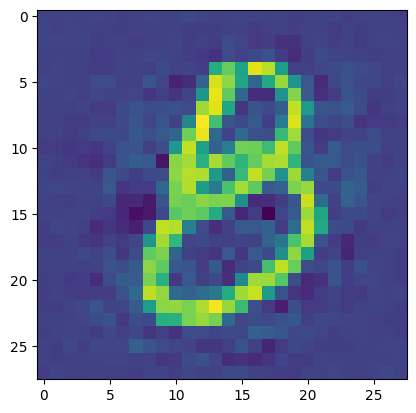

In [49]:
plt.figure()
plt.imshow(mapped_tensor[:28*28].reshape(28, 28).numpy())